# Example 2

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def loss(x, y, c):
    return (c[0]*x + c[1]*y + c[2])*(x**3 + y**3) + x**2 - 5*y**2

def grad(x, y, c):
    return np.array([-c[0]*(x**3 + y**3) - (c[0]*x + c[1]*y + c[2])*3*x**2 - 2*x, \
                     c[1]*(x**3 + y**3) + (c[0]*x + c[1]*y + c[2])*3*y**2 - 10*y])

def SGDA(x0, y0, c, Nitr=20000, alpha=0.1, noise_scale=0):
    x = np.copy(x0)
    y = np.copy(y0)
    xys = np.zeros((Nitr, 2))
    cnvg_point = 0
    for i in range(Nitr):
        g = grad(x, y, c)
        x += alpha*(g[0] + np.random.normal(scale=noise_scale))
        y += alpha*(g[1] + np.random.normal(scale=noise_scale))
        xys[i] = [x, y]
        if abs(x) > 1e3 or abs(y) > 1e3:
            break
        if (loss(x, y, c) - loss(xys[i-1][0], xys[i-1][1], c))**2 < 1e-10:
            if x**2 + y**2 < 1e-3:
                cnvg_point = 1
                break
            else:
                cnvg_point = 2
                break
    if i == Nitr - 1:
        print('Warning: Reaching max. no. of iterations.')
    return np.array([x, y]), cnvg_point, i

def OSGDA(x0, y0, c, Nitr=20000, alpha=0.1, noise_scale=0):
    x = np.copy(x0)
    y = np.copy(y0)
    xys = np.zeros((Nitr, 2))
    cnvg_point = 0
    g_prev = np.zeros(2)
    for i in range(Nitr):
        g = grad(x, y, c)
        x += alpha*(2*g[0] - g_prev[0] + np.random.normal(scale=noise_scale))
        y += alpha*(2*g[1] - g_prev[1] + np.random.normal(scale=noise_scale))
        xys[i] = [x, y]
        g_prev = np.copy(g)
        if abs(x) > 1e3 or abs(y) > 1e3:
            break
        if (loss(x, y, c) - loss(xys[i-1][0], xys[i-1][1], c))**2 < 1e-10:
            if x**2 + y**2 < 1e-3:
                cnvg_point = 1
                break
            else:
                cnvg_point = 2
                break
    if i == Nitr - 1:
        print('Warning: Reaching max. no. of iterations.')
    return np.array([x, y]), cnvg_point, i

def TTUR(x0, y0, c, Nitr=20000, alpha_x=0.01, alpha_y=0.1, noise_scale=0):
    x = np.copy(x0)
    y = np.copy(y0)
    xys = np.zeros((Nitr, 2))
    cnvg_point = 0
    for i in range(Nitr):
        g = grad(x, y, c)
        x += alpha_x*(g[0] + np.random.normal(scale=noise_scale))
        y += alpha_y*(g[1] + np.random.normal(scale=noise_scale))
        xys[i] = [x, y]
        if abs(x) > 1e3 or abs(y) > 1e3:
            break
        if (loss(x, y, c) - loss(xys[i-1][0], xys[i-1][1], c))**2 < 1e-10:
            if x**2 + y**2 < 1e-3:
                cnvg_point = 1
                break
            else:
                cnvg_point = 2
                break
    if i == Nitr - 1:
        print('Warning: Reaching max. no. of iterations.')
    return np.array([x, y]), cnvg_point, i

def OSGDA_TTUR(x0, y0, c, Nitr=20000, alpha_x=0.01, alpha_y=0.1, noise_scale=0):
    x = np.copy(x0)
    y = np.copy(y0)
    xys = np.zeros((Nitr, 2))
    cnvg_point = 0
    g_prev = np.zeros(2)
    for i in range(Nitr):
        g = grad(x, y, c)
        x += alpha_x*(2*g[0] - g_prev[0] + np.random.normal(scale=noise_scale))
        y += alpha_y*(2*g[1] - g_prev[1] + np.random.normal(scale=noise_scale))
        xys[i] = [x, y]
        g_prev = np.copy(g)
        if abs(x) > 1e3 or abs(y) > 1e3:
            break
        if (loss(x, y, c) - loss(xys[i-1][0], xys[i-1][1], c))**2 < 1e-10:
            if x**2 + y**2 < 1e-3:
                cnvg_point = 1
                break
            else:
                cnvg_point = 2
                break
    if i == Nitr - 1:
        print('Warning: Reaching max. no. of iterations.')
    return np.array([x, y]), cnvg_point, i

In [74]:
cs = [np.random.uniform(-1., 1., 3) for _ in range(10)]
c_rand = np.random.uniform(-1., 1., 3)

In [79]:
print(cs)
n_rand_funcs = 10
n_trials = 500

[array([-0.26130643, -0.02363647,  0.80237015]), array([ 0.30679342, -0.92383357,  0.17524263]), array([ 0.59742187,  0.20870299, -0.95995866]), array([0.24928201, 0.40378476, 0.70056728]), array([ 0.26539257,  0.27051036, -0.30712411]), array([ 0.99939749, -0.09027288,  0.02359497]), array([-0.26587154,  0.51419321,  0.78573512]), array([ 0.4491155 , -0.72998054, -0.03921096]), array([ 0.09245155, -0.06042132, -0.86623981]), array([0.76396897, 0.78093529, 0.7401688 ])]


### SGDA

In [81]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = SGDA(x, y, c, alpha=0.05)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

41.33582269332691
[0.1698 0.7928 0.0374]


In [82]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = SGDA(x, y, c, alpha=0.05, noise_scale=0.03)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

37.10162601626016
[0.1636 0.7916 0.0448]


In [83]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = SGDA(x, y, c, alpha=0.01)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

178.91544638639584
[0.1532 0.7596 0.0872]


In [84]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = SGDA(x, y, c, alpha=0.01, noise_scale=0.03)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

152.95972998137802
[0.1408 0.5476 0.3116]


### OSGDA

In [85]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = OSGDA(x, y, c, alpha=0.05)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

45.708580343213725
[0.359  0.6042 0.0368]


In [86]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = OSGDA(x, y, c, alpha=0.05, noise_scale=0.03)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

40.32059186189889
[0.3512 0.5902 0.0586]


In [87]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = OSGDA(x, y, c, alpha=0.01)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

180.704432329936
[0.1562 0.7524 0.0914]


In [88]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = OSGDA(x, y, c, alpha=0.01, noise_scale=0.03)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

154.43658994833254
[0.1484 0.4988 0.3528]


### TTUR

In [89]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = TTUR(x, y, c, alpha_x=0.01, alpha_y=0.05)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

182.78093158660843
[0.1756 0.7828 0.0416]


In [90]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = TTUR(x, y, c, alpha_x=0.01, alpha_y=0.05, noise_scale=0.03)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

145.42538218878911
[0.1758 0.32   0.5042]


In [91]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = TTUR(x, y, c, alpha_x=0.05, alpha_y=0.01)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

56.07838695061169
[0.1172 0.8278 0.055 ]


In [92]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = TTUR(x, y, c, alpha_x=0.05, alpha_y=0.01, noise_scale=0.03)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

52.26681664791901
[0.111 0.817 0.072]


### Combining OSGDA and TTUR

In [93]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = OSGDA_TTUR(x, y, c, alpha_x=0.01, alpha_y=0.05)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

183.77536656891496
[0.318 0.639 0.043]


In [94]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = OSGDA_TTUR(x, y, c, alpha_x=0.01, alpha_y=0.05, noise_scale=0.03)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

145.44508838017967
[0.3098 0.2178 0.4724]


In [95]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = OSGDA_TTUR(x, y, c, alpha_x=0.05, alpha_y=0.01)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

60.83957085828343
[0.1984 0.7538 0.0478]


In [96]:
cnvg_point_prob = np.zeros(3)
itr_avg = 0
for j in range(n_rand_funcs):
    c = cs[j]
    for i in range(n_trials):
        x = np.random.uniform(-3., 3)
        y = np.random.uniform(-3., 3.)
        z, cnvg_point, itr = OSGDA_TTUR(x, y, c, alpha_x=0.05, alpha_y=0.01, noise_scale=0.03)
        cnvg_point_prob[cnvg_point] += 1
        if cnvg_point > 0:
            itr_avg += itr
        
itr_avg = float(itr_avg)/float(np.sum(cnvg_point_prob[1:]))
cnvg_point_prob /= n_trials*n_rand_funcs
print(itr_avg)
print(cnvg_point_prob)

55.70798689846309
[0.2062 0.7146 0.0792]


### SGDA dynamics

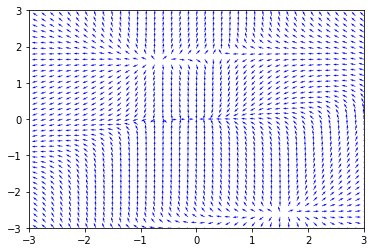

In [112]:
N = 41
xs = np.linspace(-3., 3., num=N)
ys = np.linspace(-3., 3., num=N)
grads = np.zeros((N, N, 2))
for i in range(len(xs)):
    for j in range(len(ys)):
        v = grad(xs[i], ys[j], cs[6])
        grads[j, i] = np.divide(v, np.linalg.norm(v), out=np.zeros_like(v), where=np.linalg.norm(v)!=0)
plt.figure()
plt.quiver(xs, ys, grads[:, :, 0], grads[:, :, 1], scale=60, width=0.002, color='blue')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.savefig('example2_gradient.pdf')